# we are now going to use our model to do TF chip preedictions

In [ ]:
# first we will do for just one cell type, GM12878
#later we can try other cell types like K562
#importantly, we will first process the chip seq data

#to process the chip data, we need to first create a targets.txt file, then use the saved unprocessed data to load and write it!


In [8]:
#let's make the targets.txt file which is a subset of the existing one
import pandas as pd
data_path = '/data1/lesliec/sarthak/data/DK_zarr/targets_ChIP_TF_ENCODE.txt'
targets = pd.read_csv(data_path, sep='\t', index_col=0)
targets

,identifier,clip,clip_soft,scale,sum_stat,strand_pair,description
0,ENCFF839QLL,128,32,2.0,mean,0,CHIP:ZFX:22Rv1
1,ENCFF809PHW,128,32,2.0,mean,1,CHIP:CTCF:22Rv1
2,ENCFF589EBF,128,32,2.0,mean,2,CHIP:CTCF:22Rv1 treated with 10 nM 17B-hydroxy...
3,ENCFF221XZD,128,32,2.0,mean,3,CHIP:CEBPB:A549
4,ENCFF543YLG,128,32,2.0,mean,4,CHIP:HDAC2:A549
...,...,...,...,...,...,...,...
1916,ENCFF108IFR,128,32,2.0,mean,1916,CHIP:POLR2AphosphoS5:vagina female adult (51 y...
1917,ENCFF948LKS,128,32,2.0,mean,1917,CHIP:POLR2AphosphoS5:vagina female adult (53 y...
1918,ENCFF469VIV,128,32,2.0,mean,1918,CHIP:CTCF:vagina female adult (53 years)
1919,ENCFF416EKA,128,32,2.0,mean,1919,CHIP:POLR2A:vagina female adult (53 years)


In [6]:
targets.index.to_numpy()

array([   0,    1,    2, ..., 1918, 1919, 1920])

In [10]:
#filter to ones where there is only gm1287878 in the description

targets_gm = targets[targets['description'].str.contains(':GM12878')]
targets_gm

,identifier,clip,clip_soft,scale,sum_stat,strand_pair,description
92,ENCFF930HBS,128,32,2.0,mean,92,CHIP:CBFB:GM12878
93,ENCFF304SIN,128,32,2.0,mean,93,CHIP:ETV6:GM12878
94,ENCFF935KTD,128,32,2.0,mean,94,CHIP:IKZF1:GM12878
95,ENCFF366YYF,128,32,2.0,mean,95,CHIP:ZBTB40:GM12878
96,ENCFF985ZEV,128,32,2.0,mean,96,CHIP:YY1:GM12878
...,...,...,...,...,...,...,...
249,ENCFF344JQP,128,32,2.0,mean,249,CHIP:USF1:GM12878
250,ENCFF676UXN,128,32,2.0,mean,250,CHIP:ZNF207:GM12878
251,ENCFF535BIH,128,32,2.0,mean,251,CHIP:PBX3:GM12878
252,ENCFF647IAI,128,32,2.0,mean,252,CHIP:POLR2AphosphoS5:GM12878


In [12]:
#can just filter these, and it should be good, no need to save it out
#let's look at the descriptions
print(len(targets_gm['description'].unique()))

140


In [14]:
targets_gm['description'].unique()

array(['CHIP:CBFB:GM12878', 'CHIP:ETV6:GM12878', 'CHIP:IKZF1:GM12878',
       'CHIP:ZBTB40:GM12878', 'CHIP:YY1:GM12878', 'CHIP:KAT2A:GM12878',
       'CHIP:PAX8:GM12878', 'CHIP:BACH1:GM12878', 'CHIP:TRIM22:GM12878',
       'CHIP:NFXL1:GM12878', 'CHIP:ZNF592:GM12878', 'CHIP:IKZF2:GM12878',
       'CHIP:ZNF217:GM12878', 'CHIP:HDGF:GM12878', 'CHIP:SMARCA5:GM12878',
       'CHIP:PKNOX1:GM12878', 'CHIP:TCF12:GM12878', 'CHIP:NKRF:GM12878',
       'CHIP:TBX21:GM12878', 'CHIP:MEF2B:GM12878', 'CHIP:NFYB:GM12878',
       'CHIP:CHD4:GM12878', 'CHIP:E4F1:GM12878', 'CHIP:ZSCAN29:GM12878',
       'CHIP:ARID3A:GM12878', 'CHIP:KDM1A:GM12878', 'CHIP:RELB:GM12878',
       'CHIP:EED:GM12878', 'CHIP:YBX1:GM12878', 'CHIP:ZBED1:GM12878',
       'CHIP:NFATC3:GM12878', 'CHIP:CEBPB:GM12878', 'CHIP:IRF3:GM12878',
       'CHIP:SUZ12:GM12878', 'CHIP:CEBPZ:GM12878', 'CHIP:BCLAF1:GM12878',
       'CHIP:STAT1:GM12878', 'CHIP:GABPA:GM12878', 'CHIP:HDAC2:GM12878',
       'CHIP:RBBP5:GM12878', 'CHIP:EP300:GM12878', 'CH

In [ ]:
#ok so some repeats is interesting, but again keep it same as enformer!
#now we just process it

In [15]:
#also here's something interesting, can't grab index 0, as [0] doesn't work on filtered data, sue index integer indexing with iloc
targets_gm['description'][0]

KeyError: 0

In [ ]:
targets_gm['description'].iloc[0] #this is the first one!

'CHIP:CBFB:GM12878'

# we will now manually compare some examples by loading, processing and doing npallclose

In [2]:
import zarr

zarr_og = zarr.open('/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/test_chrom_chip_tf_chunkchrom.zarr', mode='r')
zarr_new = zarr.open('/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/TFChIP_gm12878.zarr', mode='r')
zarr_og.tree()

/
├── chr1 (1921, 248956422) float16
├── chr10 (1921, 133797422) float16
├── chr11 (1921, 135086622) float16
├── chr12 (1921, 133275309) float16
├── chr13 (1921, 114364328) float16
├── chr14 (1921, 107043718) float16
├── chr15 (1921, 101991189) float16
├── chr16 (1921, 90338345) float16
├── chr17 (1921, 83257441) float16
├── chr18 (1921, 80373285) float16
├── chr19 (1921, 58617616) float16
├── chr2 (1921, 242193529) float16
├── chr20 (1921, 64444167) float16
├── chr21 (1921, 46709983) float16
├── chr22 (1921, 50818468) float16
├── chr3 (1921, 198295559) float16
├── chr4 (1921, 190214555) float16
├── chr5 (1921, 181538259) float16
├── chr6 (1921, 170805979) float16
├── chr7 (1921, 159345973) float16
├── chr8 (1921, 145138636) float16
├── chr9 (1921, 138394717) float16
├── chrX (1921, 156040895) float16
└── chrY (1921, 57227415) float16

In [3]:
zarr_new.tree()

/
├── chr1 (162, 248956422) float16
├── chr10 (162, 133797422) float16
├── chr11 (162, 135086622) float16
├── chr12 (162, 133275309) float16
├── chr13 (162, 114364328) float16
├── chr14 (162, 107043718) float16
├── chr15 (162, 101991189) float16
├── chr16 (162, 90338345) float16
├── chr17 (162, 83257441) float16
├── chr18 (162, 80373285) float16
├── chr19 (162, 58617616) float16
├── chr2 (162, 242193529) float16
├── chr20 (162, 64444167) float16
├── chr21 (162, 46709983) float16
├── chr22 (162, 50818468) float16
├── chr3 (162, 198295559) float16
├── chr4 (162, 190214555) float16
├── chr5 (162, 181538259) float16
├── chr6 (162, 170805979) float16
├── chr7 (162, 159345973) float16
├── chr8 (162, 145138636) float16
├── chr9 (162, 138394717) float16
├── chrX (162, 156040895) float16
└── chrY (162, 57227415) float16

In [ ]:
#yeah seems quite straightforward, let's choose a random chromosome and section



#now we have certain indices to manually check!

import pandas as pd
data_path = '/data1/lesliec/sarthak/data/DK_zarr/targets_ChIP_TF_ENCODE.txt'
targets = pd.read_csv(data_path, sep='\t', index_col=0)
targets_gm = targets[targets['description'].str.contains(':GM12878')]
indices = targets_gm.index.to_numpy()
indices

array([ 92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253])

In [12]:
import numpy as np
def process_data(seq, blacklist, unmap, scale, clip, clip_soft, blacklist_pct=0.5, umap_clip=0.5):
    '''This function will process the data, it does the basenji processing where you do blacklist clipping
    Then skip pooling (can do it later, only might affect unmappable clipping, but if doing mean pooling won't affect clipsoft and clip),
    Then scale and clip soft then clip, 
    then extereme clip,
    then change unmappable regions
    
    Args:
        seq: the sequence to process
        blacklist: the already loaded values form the blacklist npz file that was loaded
        unmappable_npz: the already loaded values from the unmappable regions npz file that was loaded
        scale: the scale to apply (from targets.txt)
        clip: the clip to apply (from targets.txt)
        clip_soft: the soft clip to apply (from targets.txt)
        blacklist_pct: the percentage to clip the blacklist to
        
    
    '''
    #first find blacklist values and if they overlap, clip them to baseline
    if blacklist.sum() > 0:
        baseline_cov = np.percentile(seq, 100*blacklist_pct, axis=1)
        seq_blacklist = seq[:,blacklist==1]
        seq_blacklist = np.minimum(seq_blacklist, baseline_cov[:,None])
        seq[:,blacklist==1] = seq_blacklist
    
    #now scale and clip soft then clip
    seq = seq * scale
    clip_mask = (seq > 32)
    if clip_mask.sum() > 0:
        seq[clip_mask] = np.sqrt(seq[clip_mask] - clip_soft+1) + clip_soft-1
        seq = np.clip(seq,0,clip)
    
    #now extreme clip, could be extreme values like lots of 0.0002 but then one that is 13. Not good potentially
    extreme_clip = np.percentile(seq, 100*0.9999999, axis=1)
    seq = np.minimum(seq, extreme_clip[:,None])

    #and finally, use unmappable regions
    if unmap.sum() > 0:
        seq_target_null = np.percentile(seq, q=[100*umap_clip], axis=1)
        seq_unmap = seq[:,unmap==1]
        seq_unmap = np.minimum(seq_unmap, seq_target_null[0,:,None])
        seq[:,unmap==1] = seq_unmap

    return seq

unmappable_file: str = '/data1/lesliec/sarthak/data/borzoi/umap.npz'
blacklist_file: str = '/data1/lesliec/sarthak/data/borzoi/blacklist.npz'

with np.load(blacklist_file) as data:
    blacklist = {key: np.array(data[key]) for key in data}
with np.load(unmappable_file) as data:
    unmappable = {key: np.array(data[key]) for key in data}

In [ ]:
chrom = 'chr13'
start = int(1e6*13) #check a random location too
end = start + int(1e6)
targets_scale = targets_gm['scale'].iloc[0]
targets_clip = targets_gm['clip'].iloc[0]
targets_clip_soft = targets_gm['clip_soft'].iloc[0]

for i,idx in enumerate(indices):
    og_val = zarr_og[chrom][i:i+1, start:end]
    newval = zarr_new[chrom][idx:idx+1, start:end]
    #now have to process og_val
    blist = blacklist[chrom][start:end]
    unmap = unmappable[chrom][start:end]
    data = process_data(og_val, blist, unmap, targets_scale, targets_clip, targets_clip_soft)
    print(f'Index {i}, {np.allclose(og_val, data)}') #wait why is ogval the same as data??

Index 0, True
Index 1, True
Index 2, True
Index 3, True
Index 4, True
Index 5, True
Index 6, True
Index 7, True
Index 8, True
Index 9, True
Index 10, True
Index 11, True
Index 12, True
Index 13, True
Index 14, True
Index 15, True
Index 16, True
Index 17, True
Index 18, True
Index 19, True
Index 20, True
Index 21, True
Index 22, True
Index 23, True
Index 24, True
Index 25, True
Index 26, True
Index 27, True
Index 28, True
Index 29, True
Index 30, True
Index 31, True
Index 32, True
Index 33, True
Index 34, True
Index 35, True
Index 36, True
Index 37, True
Index 38, True
Index 39, True
Index 40, True
Index 41, True
Index 42, True
Index 43, True
Index 44, True
Index 45, True
Index 46, True
Index 47, True
Index 48, True
Index 49, True
Index 50, True
Index 51, True
Index 52, True
Index 53, True
Index 54, True
Index 55, True
Index 56, True
Index 57, True
Index 58, True
Index 59, True
Index 60, True
Index 61, True
Index 62, True
Index 63, True
Index 64, True
Index 65, True
Index 66, True
Index

In [19]:
print(og_val, newval, blist, unmap, targets_scale, targets_clip, targets_clip_soft, sep='\n')

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0 0 0 ... 0 0 0]
[1 1 1 ... 1 1 1]
2.0
128
32


In [ ]:
og_val.max() #oh because it's all 0 lol!

0.0

In [42]:
chrom = 'chr13'
start = int(1e6*31) #check a random location too
end = start + int(1e6)
targets_scale = targets_gm['scale'].iloc[0]
targets_clip = targets_gm['clip'].iloc[0]
targets_clip_soft = targets_gm['clip_soft'].iloc[0]

for i,idx in enumerate(indices):
    og_val = zarr_og[chrom][idx:idx+1, start:end]
    newval = zarr_new[chrom][i:i+1, start:end]
    #now have to process og_val
    blist = blacklist[chrom][start:end]
    unmap = unmappable[chrom][start:end]
    data = process_data(og_val, blist, unmap, targets_scale, targets_clip, targets_clip_soft)
    print(f'Index {i}, {np.allclose(og_val, data)}, {np.allclose(data,newval)}')
    break

Index 0, False, True


In [43]:
i,idx

(0, 92)

In [44]:
og_val.max()

14.78

In [45]:
og_val.shape

(1, 1000000)

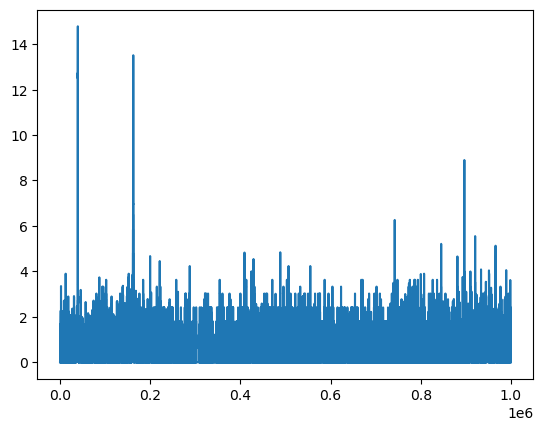

In [46]:
import matplotlib.pyplot as plt
plt.plot(og_val[0])

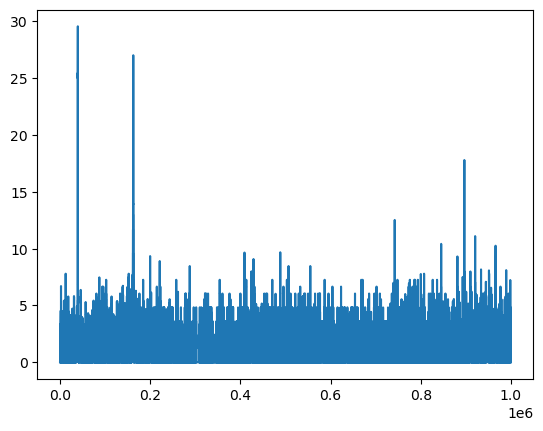

In [47]:
plt.plot(newval[0])

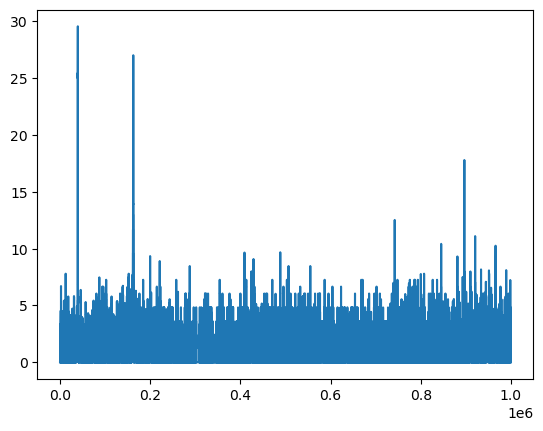

In [48]:
plt.plot(data[0])

In [50]:
#ok this does seem good!!

chrom = 'chr13'
start = int(1e6*31) #check a random location too
end = start + int(1e6)
targets_scale = targets_gm['scale'].iloc[0]
targets_clip = targets_gm['clip'].iloc[0]
targets_clip_soft = targets_gm['clip_soft'].iloc[0]

for i,idx in enumerate(indices):
    og_val = zarr_og[chrom][idx:idx+1, start:end]
    newval = zarr_new[chrom][i:i+1, start:end]
    #now have to process og_val
    blist = blacklist[chrom][start:end]
    unmap = unmappable[chrom][start:end]
    data = process_data(og_val, blist, unmap, targets_scale, targets_clip, targets_clip_soft)
    if not np.allclose(data,newval):
        break
    print(f'Index {i}, {np.allclose(og_val, data)}, {np.allclose(data,newval)}')

Index 0, False, True


Text(0.5, 1.0, 'Processed Value')

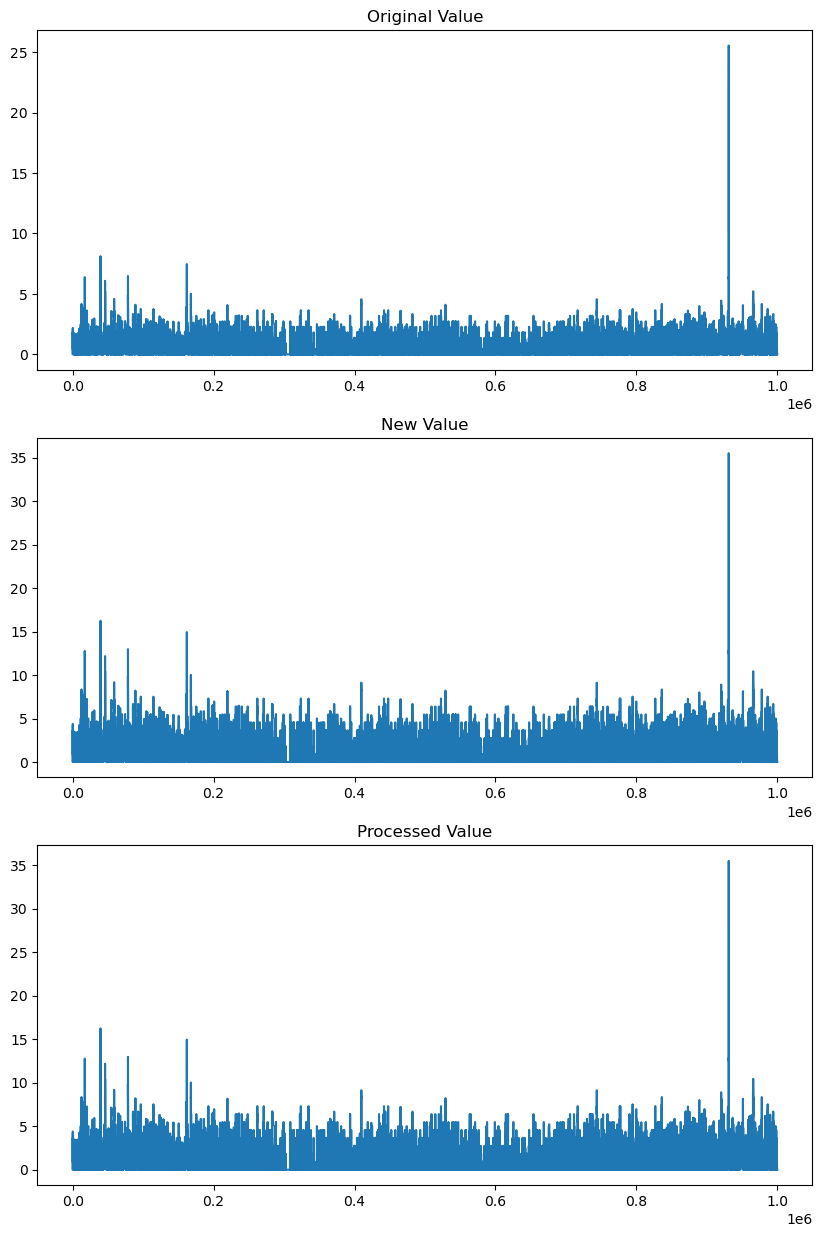

In [51]:
#ok so the first one is true then the second isn't, probably numerical precision?
#do a 3 plot subplot
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
axs[0].plot(og_val[0])
axs[0].set_title('Original Value')
axs[1].plot(newval[0])
axs[1].set_title('New Value')
axs[2].plot(data[0])
axs[2].set_title('Processed Value')


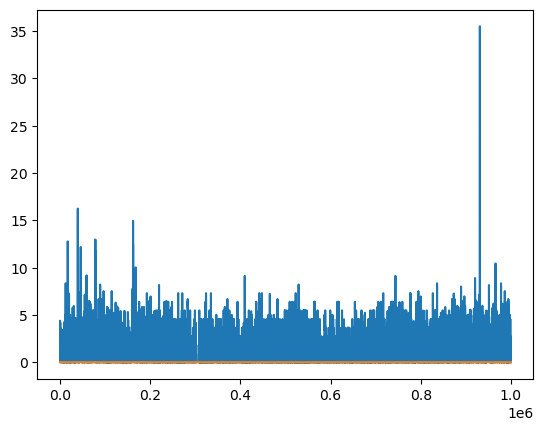

In [ ]:
plt.plot(newval[0])
plt.plot(data[0]-newval[0]) #diff is basically 0, so it is npallclsoe

In [53]:
chrom = 'chr13'
start = int(1e6*31) #check a random location too
end = start + int(1e6)
targets_scale = targets_gm['scale'].iloc[0]
targets_clip = targets_gm['clip'].iloc[0]
targets_clip_soft = targets_gm['clip_soft'].iloc[0]

for i,idx in enumerate(indices):
    og_val = zarr_og[chrom][idx:idx+1, start:end]
    newval = zarr_new[chrom][i:i+1, start:end]
    #now have to process og_val
    blist = blacklist[chrom][start:end]
    unmap = unmappable[chrom][start:end]
    data = process_data(og_val, blist, unmap, targets_scale, targets_clip, targets_clip_soft)
    val1 = np.allclose(og_val, data, atol=0.01, rtol=0.01) #data has to be within 1%, or it has to be within 1% of the original value
    val2 = np.allclose(data,newval, atol=0.01, rtol=0.01)
    if not val2:
        break
    print(f'Index {i}, {val1}, {val2}')

Index 0, False, True
Index 1, False, True
Index 2, False, True
Index 3, False, True
Index 4, False, True
Index 5, False, True
Index 6, False, True
Index 7, False, True
Index 8, False, True
Index 9, False, True
Index 10, False, True
Index 11, False, True
Index 12, False, True
Index 13, False, True
Index 14, False, True
Index 15, False, True
Index 16, False, True
Index 17, False, True
Index 18, False, True
Index 19, False, True
Index 20, False, True
Index 21, False, True
Index 22, False, True
Index 23, False, True
Index 24, False, True
Index 25, False, True
Index 26, False, True
Index 27, False, True
Index 28, False, True
Index 29, False, True
Index 30, False, True
Index 31, False, True
Index 32, False, True
Index 33, False, True
Index 34, False, True
Index 35, False, True
Index 36, False, True
Index 37, False, True
Index 38, False, True
Index 39, False, True
Index 40, False, True
Index 41, False, True
Index 42, False, True
Index 43, False, True
Index 44, False, True
Index 45, False, Tru

# testing dataset

In [1]:
#relatively striaghtforward, need to test dataset to make sure it makes sense and that it works!
#let's first load it in like we would for the multiple RNA seq

# dataset:
#   _name_: GeneralLoader
#   dataset_name: GeneralLoader
#   batch_size_eval: ${eval:${.batch_size} * 2}
#   shuffle: true
#   pin_memory: true
#   batch_size: 1
#   num_workers: 7
#   data_path: /data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/cell_type_arrays/GM12878_DNase.npz
#   length: 524288
#   shift_sequences: 0
#   load_in: false
#   rc_aug: false
#   mlm: 0
#   acc_mlm: 0
#   acc_type: continuous
#   acc_mask_size: 500
#   weight_peaks: false
#   additional_data: /data1/lesliec/sarthak/data/borzoi/borzoi.zarr
#   sequences_bed_file: /data1/lesliec/sarthak/data/DK_zarr/sequences_borzoi_fold3-4.bed
#   additional_data_idxs: /data1/lesliec/sarthak/data/DK_zarr/idx_lists/gm12878_RNA.json
import sys
sys.path.append('/data1/lesliec/sarthak/caduceus/src/dataloaders/datasets')
from general_dataset import GeneralDataset
data_path = '/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/cell_type_arrays/GM12878_DNase.npz'
length = 524288
shift_sequences = 0
load_in = False
rc_aug = False
mlm = 0
acc_mlm = 0
acc_type = 'continuous'
acc_mask_size = 500
weight_peaks = False
additional_data = '/data1/lesliec/sarthak/data/borzoi/borzoi.zarr'
sequences_bed_file = '/data1/lesliec/sarthak/data/DK_zarr/sequences_borzoi_fold3-4.bed'
additional_data_idxs = '/data1/lesliec/sarthak/data/DK_zarr/idx_lists/gm12878_RNA.json'

dataset = GeneralDataset(split='train',
    data_path=data_path,
    length=length,
    shift_sequences=shift_sequences,
    load_in=load_in,
    rc_aug=rc_aug,
    mlm=mlm,
    acc_mlm=acc_mlm,
    acc_type=acc_type,
    acc_mask_size=acc_mask_size,
    weight_peaks=weight_peaks,
    additional_data=additional_data,
    sequences_bed_file=sequences_bed_file,
    additional_data_idxs=additional_data_idxs
)

In [6]:
out = dataset[0]

In [7]:
for i in out[0]:
    print(i.shape, i.dtype)
for i in out[1]:
    print(i.shape, i.dtype)

torch.Size([6, 524288]) torch.float32
torch.Size([2, 524288]) torch.float32
torch.Size([524288, 6]) torch.float32
torch.Size([524288, 2]) torch.float32
(6144, 30) float16


In [ ]:
#importantly it's 6144 (pooled length) x 30 (number of outputs)

In [2]:
#let's see it with this new set of data

sequences_bed_file = '/data1/lesliec/sarthak/data/DK_zarr/sequences_enformer.bed'
additional_tracks = '/data1/lesliec/sarthak/data/DK_zarr/zarr_arrays/TFChIP_gm12878.zarr'

dataset = GeneralDataset(split='train',
    data_path=data_path,
    length=length,
    shift_sequences=shift_sequences,
    load_in=load_in,
    rc_aug=rc_aug,
    mlm=mlm,
    acc_mlm=acc_mlm,
    acc_type=acc_type,
    acc_mask_size=acc_mask_size,
    weight_peaks=weight_peaks,
    sequences_bed_file=sequences_bed_file,
    additional_tracks=additional_tracks,
)

In [3]:
dataset.additional_tracks['chr13'].shape

(162, 114364328)

In [4]:
outputs = dataset[0]
for i in outputs[0]:
    print(i.shape, i.dtype)
for i in outputs[1]:
    print(i.shape, i.dtype)

torch.Size([6, 524288]) torch.float32
torch.Size([2, 524288]) torch.float32
torch.Size([524288, 6]) torch.float32
torch.Size([524288, 2]) torch.float32
(524288, 162) float16
